In [2]:
from vaspvis import standard

dos_folder = '/global/cfs/cdirs/m3578/chenbo/PdCrO2_calculation/dos_nonllinear' 

/global/cfs/cdirs/m3578/chenbo/.conda/envs/ogre_debug/lib/python3.9/site-packages/pymatgen/io/vasp/inputs.py:276: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, "rt") as f:


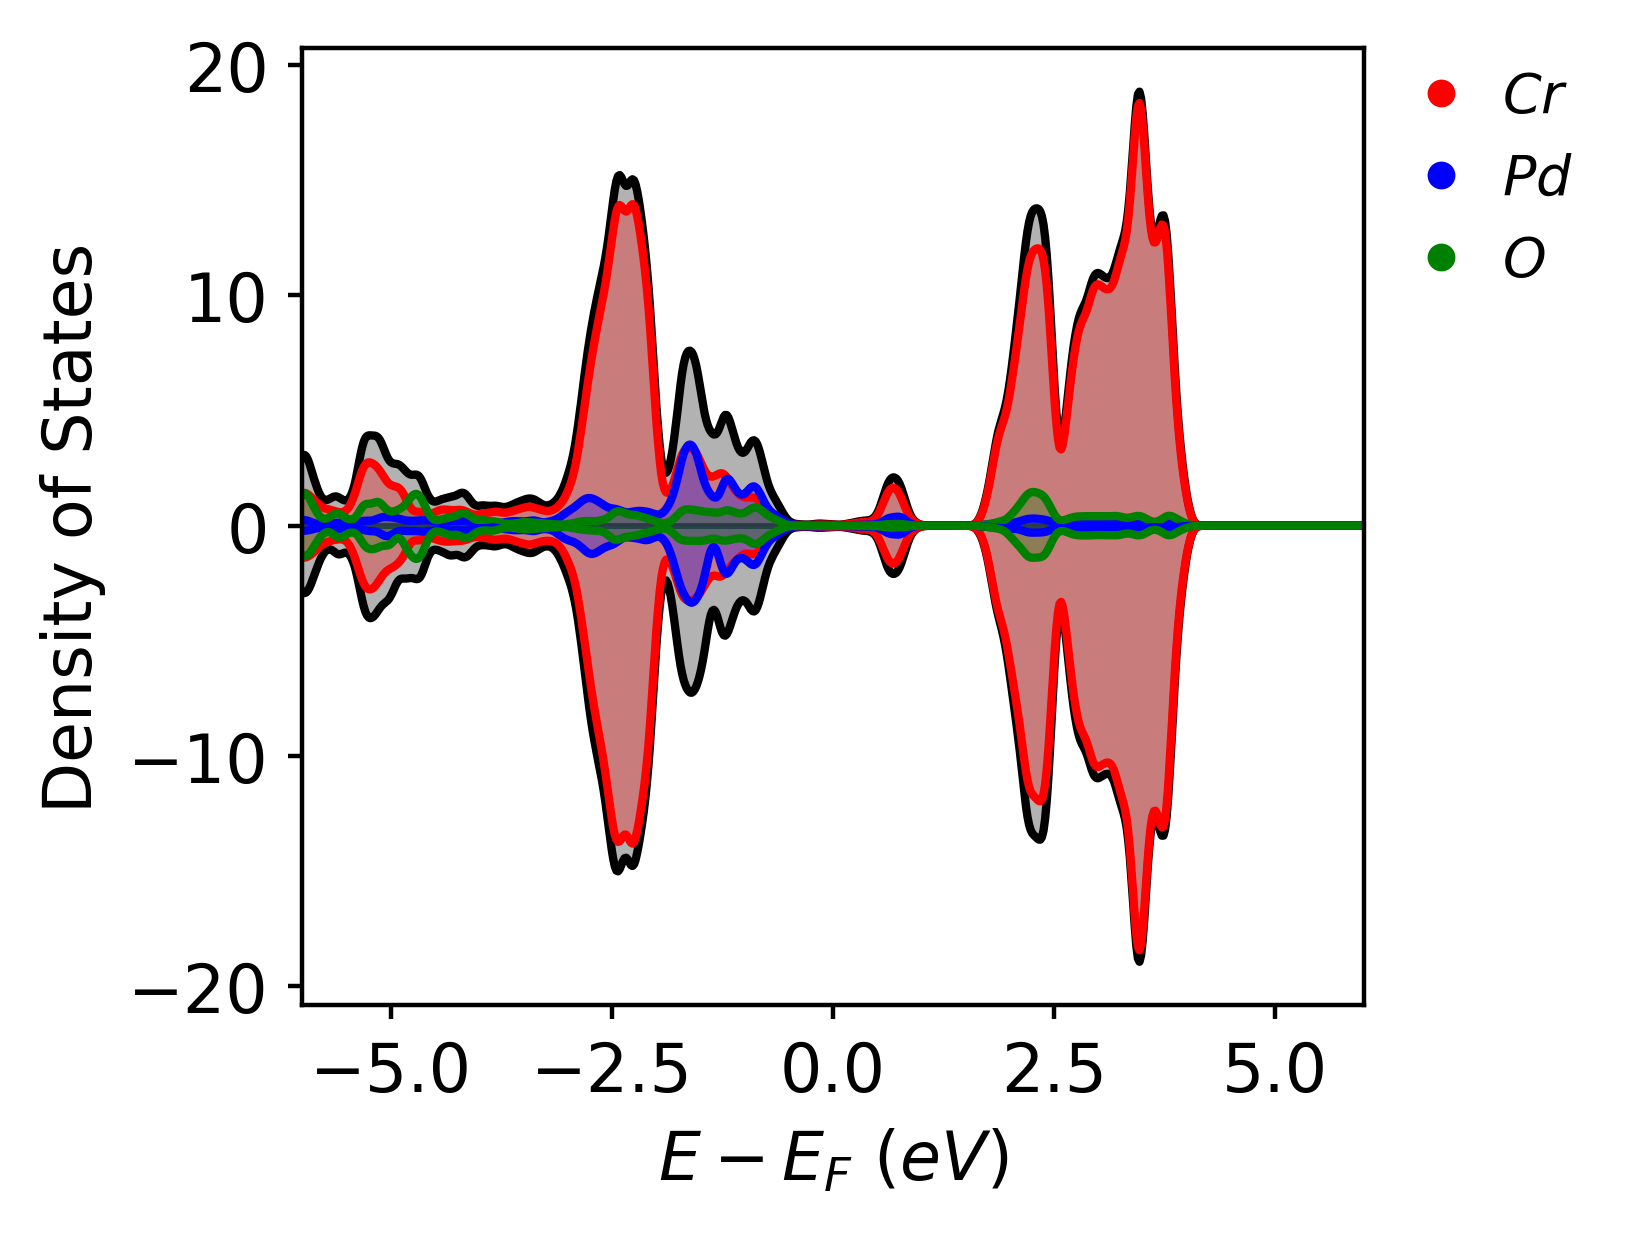

In [3]:
standard.dos_elements_spin_polarized(
    folder=dos_folder,
    elements=['Cr', 'Pd', 'O'],
    energyaxis='x',
)

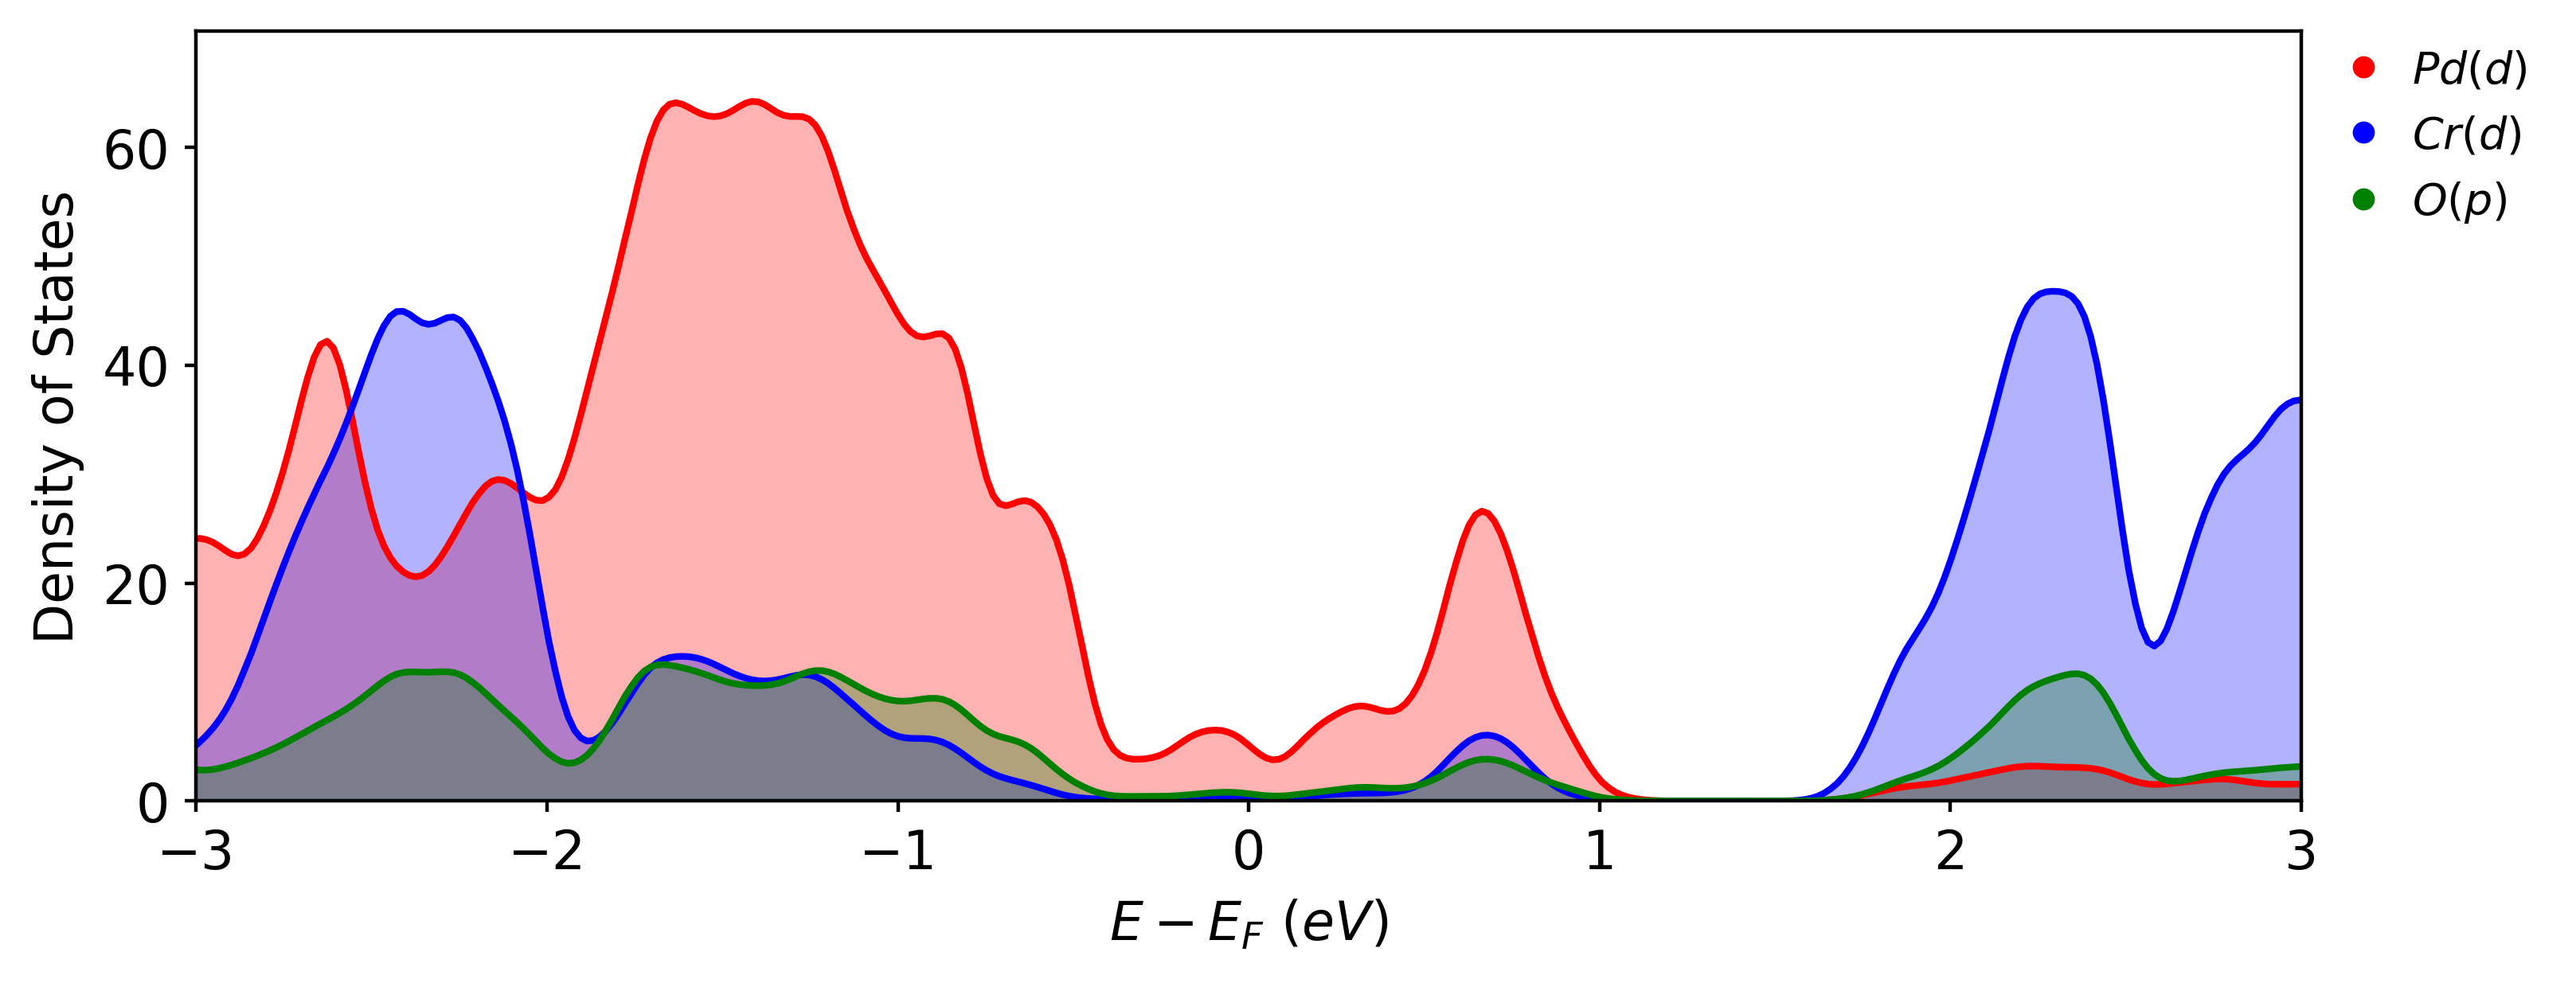

In [12]:
from vaspvis import standard as st

st.dos_element_spd(
    folder=dos_folder,
    element_spd_dict = {'Pd':'d', 'Cr':'d', 'O':'p'},
    energyaxis       = 'x',      # 把能量放到纵轴
    erange           = [-3, 3],  # eV 范围
    sigma            = 0.05,     # Gaussian 平滑
    fill             = True,
    total            = False,
    figsize          = (8, 3),
    save             = 'PdCrO_d_DOS.png'
)

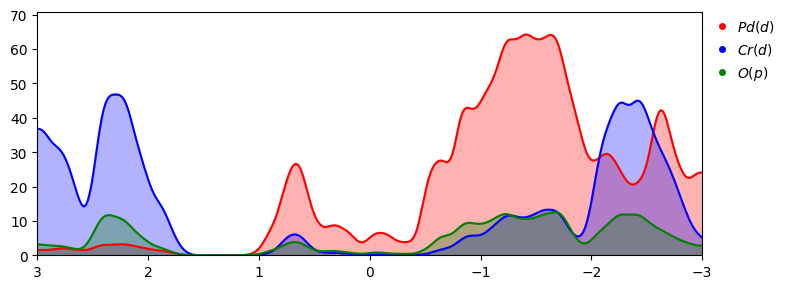

In [13]:
import matplotlib.pyplot as plt
from vaspvis import Dos

fig, ax = plt.subplots(figsize=(8, 3))

dos = Dos(folder=dos_folder)
dos.plot_element_spd(
    ax,
    element_spd_dict={'Pd':'d', 'Cr':'d', 'O':'p'},
    energyaxis      ='x',
    erange          =[-3, 3],      # 先正常给
    sigma           =0.05,
    fill            =True,
    total           =False
)

ax.invert_xaxis()                  # ← 翻转坐标方向
fig.tight_layout()
fig.savefig('PdCrO_d_DOS_rev.png', dpi=300)


In [9]:
import argparse, numpy as np
from pymatgen.core import Structure

parser = argparse.ArgumentParser()
parser.add_argument("-m", "--magmom", default="MAGMOM.txt")
parser.add_argument("-p", "--poscar", default="POSCAR")
parser.add_argument("-o", "--mcif",   default="vesta.mcif")
args, _ = parser.parse_known_args()          # ← 让 notebook 忽略 -f …

# --- 读取 POSCAR ---
structure = Structure.from_file(args.poscar)

# --- 读取 MAGMOM ---
mag_flat = np.fromstring(open(args.magmom).read(), sep=" ")
magmoms  = mag_flat.reshape(-1, 3)

if len(structure) != len(magmoms):
    raise ValueError(f"Atom count mismatch: POSCAR {len(structure)}, MAGMOM {len(magmoms)}")

for i, site in enumerate(structure):
    site.properties["magmom"] = magmoms[i]

structure.to(fmt="mcif", filename=args.mcif)
print("MCIF written ➜", args.mcif)


/global/cfs/cdirs/m3578/chenbo/.conda/envs/ogre_debug/lib/python3.9/site-packages/pymatgen/core/structure.py:2872: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, "rt", errors="replace") as f:
/global/cfs/cdirs/m3578/chenbo/.conda/envs/ogre_debug/lib/python3.9/site-packages/pymatgen/io/cif.py:1517: FutureWarning: We strongly discourage using implicit binary/text `mode`, and this would not be allowed after 2025-06-01. I.e. you should pass t/b in `mode`.
  with zopen(filename, mode=mode) as file:


MCIF written ➜ vesta.mcif
